In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data
from fbprophet import Prophet
from datetime import datetime


In [2]:
# 페이스북의 prophet 기본적으로 sklearn 모델을 따름
# 컬럼 ds, y

In [3]:
import fix_yahoo_finance

In [4]:
# 데이터 수집
import fix_yahoo_finance as yf
yf.pdr_override()# 이거 뭥미

In [5]:
#시작일 ,종료일
start_date = '2010-03-01'
end_date = '2018-10-18'
td_code = '035420' + '.ks'
NAVER = data.get_data_yahoo(td_code, start_date, end_date)

[*********************100%***********************]  1 of 1 downloaded


In [6]:
'''
'Open': 시작가,
'High': 고가
'Low': 저가
'Close':종가 -> 학습(모듈 사용) -> 예측
'Adj Close':수정종가 -> 평균이동선을 그릴 수 있음.(5,20,60,120) : 
            골드 크로스, 데드 크로스를 예측
'Volume':주식거래량
'''
NAVER.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-03-02,45474.300781,46332.300781,44861.398438,46209.699219,43690.289063,1082885
2010-03-03,46332.300781,46577.398438,44738.800781,44861.398438,42415.492188,923754
2010-03-04,45229.101563,46087.101563,44984.000000,45351.699219,42879.070313,439606
2010-03-05,45351.699219,46332.300781,45229.101563,45351.699219,42879.070313,700220
2010-03-08,46454.800781,46945.101563,45964.601563,46945.101563,44385.585938,1265345


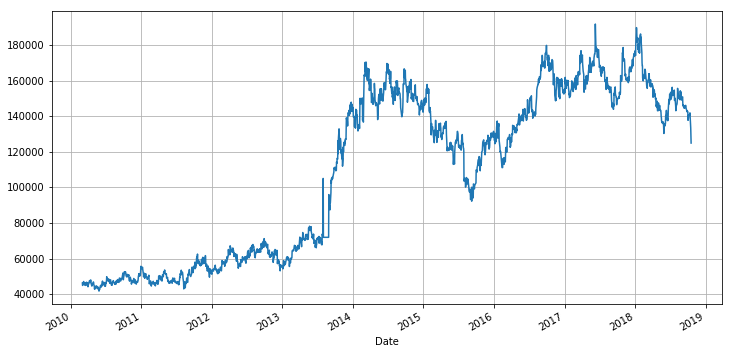

In [7]:
NAVER['Close'].plot(figsize=(12,6), grid=True)

In [8]:
# 데이터를 2016-12-31일까지 나머지 구간을 예측
train = NAVER[:'2016-12-31']

In [9]:
train.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-12-23,154200.0,155400.0,152400.0,153600.0,151213.546875,266875
2016-12-26,153200.0,154600.0,153000.0,153000.0,150622.859375,103325
2016-12-27,153200.0,154600.0,152600.0,154400.0,152001.109375,159810
2016-12-28,157000.0,157000.0,152600.0,152600.0,151337.656250,288685
2016-12-29,151600.0,155400.0,150800.0,155000.0,153717.796875,281620


### 예측
- x축 시간, y축 증가
- {ds 시간, y 증가}

In [10]:
# 나머지 날짜 붙임
# 년간, 일간 계절성 true
# fitting 

In [11]:
dic = {'ds':train.index, 'y':train['Close']}
df = pd.DataFrame(dic)
df.head(2)

,ds,y
Date,,
2010-03-02,2010-03-02,46209.699219
2010-03-03,2010-03-03,44861.398438


In [12]:
df.reset_index(inplace=True)
del df['Date']

In [13]:
df.head()

,ds,y
0,2010-03-02,46209.699219
1,2010-03-03,44861.398438
2,2010-03-04,45351.699219
3,2010-03-05,45351.699219
4,2010-03-08,46945.101563


In [14]:
NAVER.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-12,138000.0,142000.0,132500.0,142000.0,142000.0,654013
2018-10-15,138500.0,139000.0,135000.0,136000.0,136000.0,642772
2018-10-16,137500.0,138500.0,130000.0,133500.0,133500.0,575704
2018-10-17,132500.0,134500.0,129500.0,130000.0,130000.0,5304519
2018-10-18,128000.0,128000.0,123500.0,125000.0,125000.0,880738


In [31]:
m = Prophet(daily_seasonality=True, yearly_seasonality=True)

In [32]:
m.fit(df)

D:\anaconda\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [33]:
# 예측 기간 지정
# 2018-10-17 예측-656일-네이버 달력에서 검색, 파이썬에서 짜서 해도됨

In [34]:
fu = m.make_future_dataframe(periods=657) # 이거 결과는 만들어준거다. ds만
fu.tail(2)

,ds
2350,2018-10-16
2351,2018-10-17


In [35]:
forecast = m.predict(fu) # 예측값들의 모임

In [36]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2347,2018-10-13,243950.174206,167284.489710,332364.557486,161120.413562,326814.589235,6072.923701,6072.923701,6072.923701,-149.565915,...,18.695567,18.695567,18.695567,6203.794050,6203.794050,6203.794050,0.0,0.0,0.0,250023.097907
2348,2018-10-14,244068.358374,166296.119674,333726.312346,160995.870547,326978.332442,6014.101752,6014.101752,6014.101752,-149.565915,...,18.695931,18.695931,18.695931,6144.971737,6144.971737,6144.971737,0.0,0.0,0.0,250082.460126
2349,2018-10-15,244186.542542,167557.726119,334535.692504,160871.327531,327142.075648,5742.484425,5742.484425,5742.484425,-149.565915,...,-175.839987,-175.839987,-175.839987,6067.890327,6067.890327,6067.890327,0.0,0.0,0.0,249929.026967
2350,2018-10-16,244304.726710,169337.597642,334455.345258,160775.356113,327340.924920,6133.370884,6133.370884,6133.370884,-149.565915,...,309.889300,309.889300,309.889300,5973.047500,5973.047500,5973.047500,0.0,0.0,0.0,250438.097594
2351,2018-10-17,244422.910878,167291.094520,333776.833209,160741.601770,327669.722677,5867.404033,5867.404033,5867.404033,-149.565915,...,155.893925,155.893925,155.893925,5861.076023,5861.076023,5861.076023,0.0,0.0,0.0,250290.314911


In [80]:
df.tail()

,ds,y
1690,2016-12-23,153600.0
1691,2016-12-26,153000.0
1692,2016-12-27,154400.0
1693,2016-12-28,152600.0
1694,2016-12-29,155000.0


In [37]:
# 데이터 중에서 필요한 부분
# yhat, yhat_lower, yhat_upper, ds

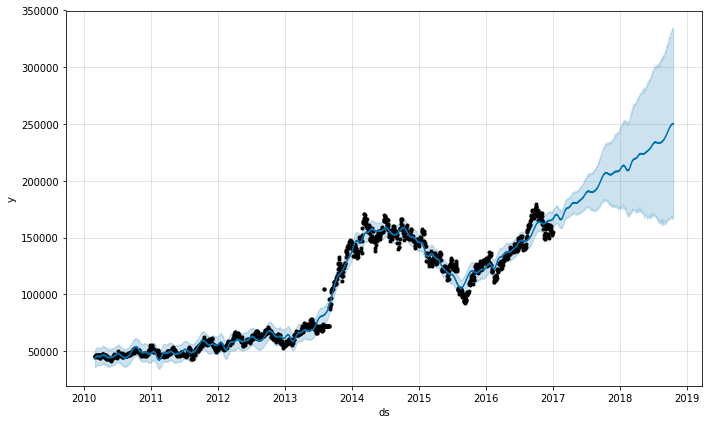

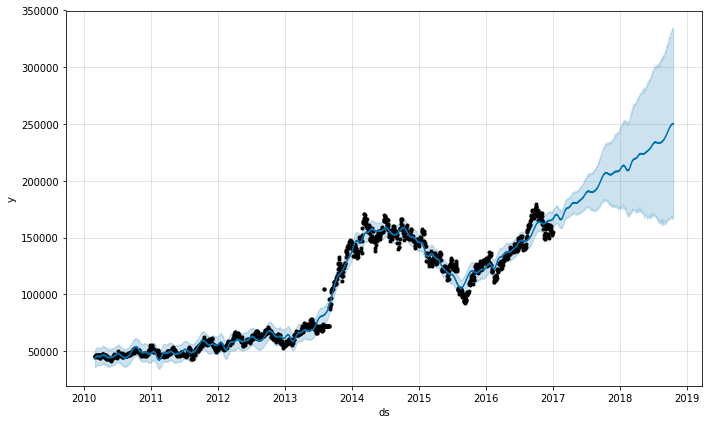

In [38]:
m.plot(forecast)

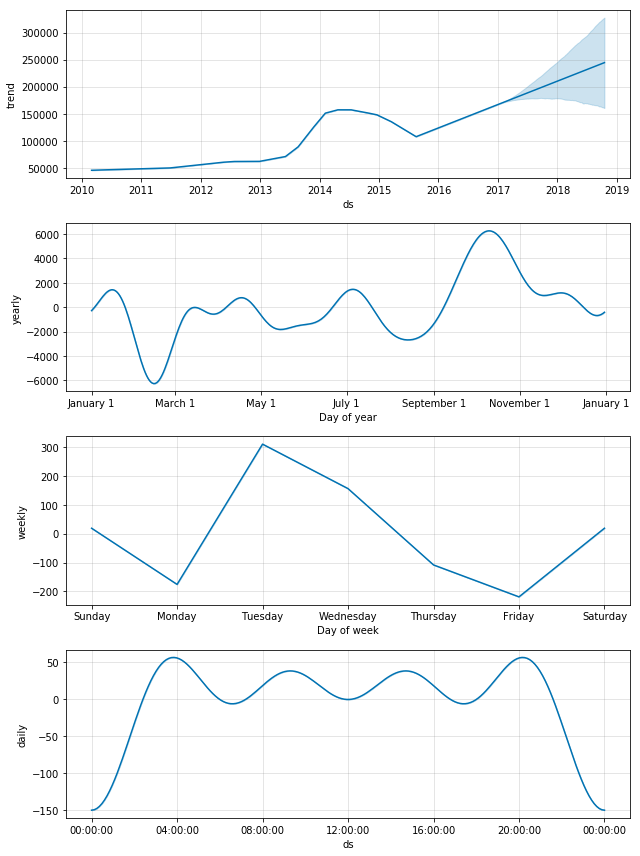

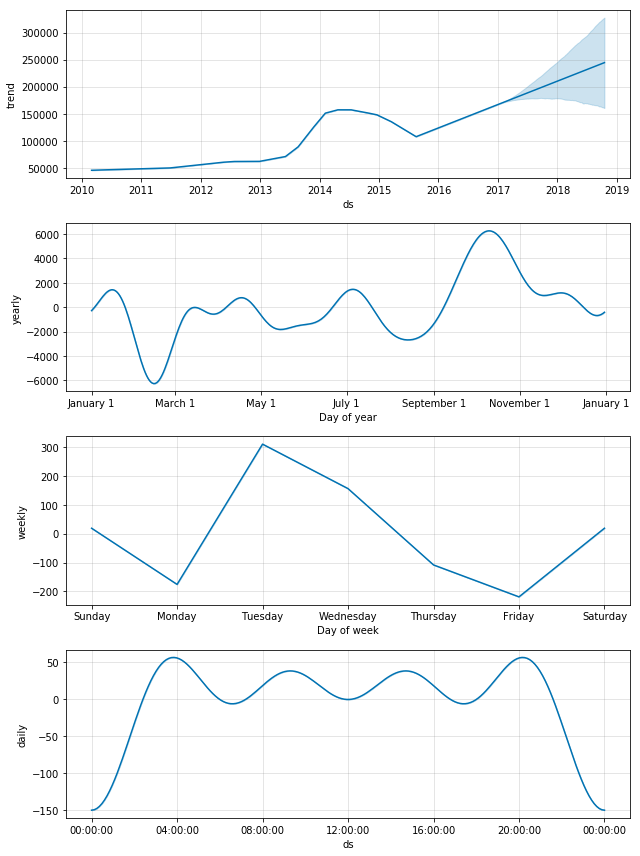

In [39]:
m.plot_components( forecast )
# 트렌드 : 상승장으로 예측(계속 성장 할 것이다)
# 연간 : 매월 sep 이전에 구매해서 Nove 전에 주식을 판매하면 최대 이익을 얻을 것이다.
# 주간 : 월요에 최저가 ~ 수요일에 최고가

### 어제까지 예측

- 예측의 길이가 갈수록 오차율이 커진다.
- 최소값을 기준으로 보수적으로 살펴보면 실제 데이터와 유사함을 확인 할 수 있다.
- 단, 종목 하나만 학습 -> 종목수를 늘려나가서 모델을 개선

D:\anaconda\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


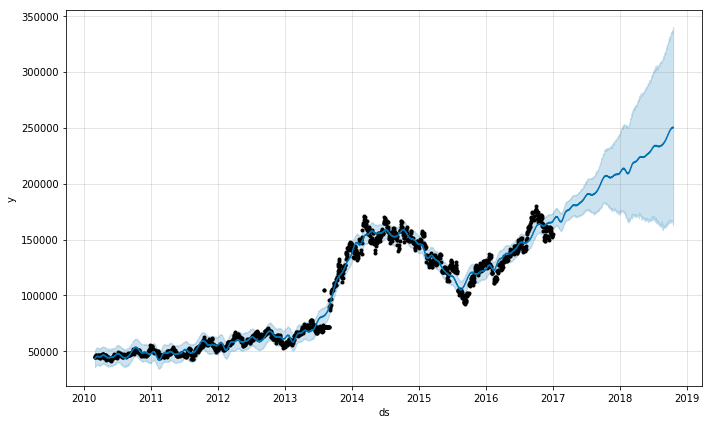

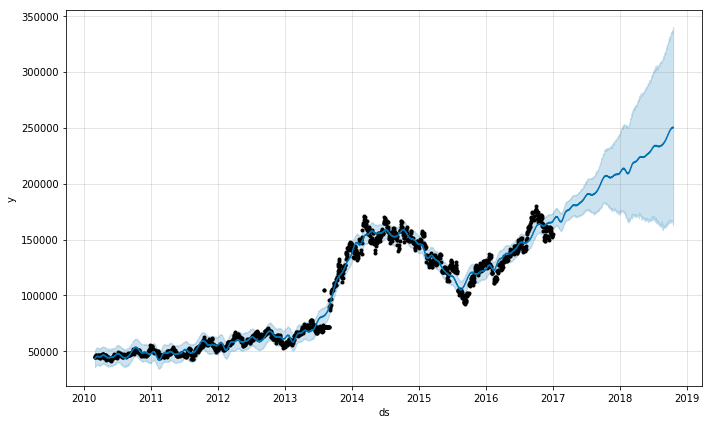

In [40]:
m = Prophet(daily_seasonality=True)
m.fit(df)
fu =m.make_future_dataframe(periods = 657)
fu.tail(2)
forecast = m.predict(fu)
m.plot(forecast)

### 주식 분석 기법

** 개요 **
- 기본적 분석/ 기술적 분석을 혼용하여 사용
- 초보적인 기본 방식 이동평균선을 이용하여 분석
- 증권사들은 5, 20, 60, 120일 단위로 이동 평균선 차트를 제공
- 대부분 투자하는 기본 사항은 이동 평균선을 분석해서 매도, 매수 등을 수행하는 이론을 기반
- + 애널리스트(혹은 퀀트)등이 개인 알고리즘 (경험, 개인이 가지고 있는 정보 수치) 

** 이동평균선 **
- SMA : 5일 주기
- 5일 동안 이동평균을 연결한 것
- 재료 : 수정종가(Adjusted closing price) : Adj close
- (1day + 2day + 3day + 4day + 5day)/5 => 1개의 이동평균 값이됨
- 중기와 단기가 만나는 지점이 cross? 뭔말

In [41]:
# 네이버의 전체 주식 정보 획득
NAVER.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-12,138000.0,142000.0,132500.0,142000.0,142000.0,654013
2018-10-15,138500.0,139000.0,135000.0,136000.0,136000.0,642772
2018-10-16,137500.0,138500.0,130000.0,133500.0,133500.0,575704
2018-10-17,132500.0,134500.0,129500.0,130000.0,130000.0,5304519
2018-10-18,128000.0,128000.0,123500.0,125000.0,125000.0,880738


In [81]:
start_date = '2002-10-29'
end_date = '2018-10-18'
td_code = '035420' + '.ks'
NAVER = data.get_data_yahoo(td_code, start_date, end_date)
NAVER.tail(2)

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-17,132500.0,134500.0,129500.0,130000.0,130000.0,5304519
2018-10-18,128000.0,128000.0,123500.0,125000.0,125000.0,880738


In [45]:
#거래량이 없는 날은 예외
len(NAVER.index)

2130

In [47]:
NAVER = NAVER[ NAVER['Volume']!=0] # 이게 야후가 네이버껄 수집 했기 때문에 장이 열리지 않는날도 수집될 가능성이 큼
len(NAVER)

2104

In [48]:
NAVER.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-03-02,45474.300781,46332.300781,44861.398438,46209.699219,43690.289063,1082885
2010-03-03,46332.300781,46577.398438,44738.800781,44861.398438,42415.492188,923754


In [49]:
# 5일 단위 이동평균값 계산해서 바로 컬럼 추가
NAVER['MA5'] = NAVER['Adj Close'].rolling(window=5).mean()

In [50]:
NAVER.head(10)

,Open,High,Low,Close,Adj Close,Volume,MA5
Date,,,,,,,
2010-03-02,45474.300781,46332.300781,44861.398438,46209.699219,43690.289063,1082885,NaN
2010-03-03,46332.300781,46577.398438,44738.800781,44861.398438,42415.492188,923754,NaN
2010-03-04,45229.101563,46087.101563,44984.000000,45351.699219,42879.070313,439606,NaN
2010-03-05,45351.699219,46332.300781,45229.101563,45351.699219,42879.070313,700220,NaN
2010-03-08,46454.800781,46945.101563,45964.601563,46945.101563,44385.585938,1265345,43249.901563
2010-03-09,47067.699219,47067.699219,46087.101563,47067.699219,44501.503906,573454,43412.144532
2010-03-10,47067.699219,47312.800781,45719.398438,45842.000000,43342.632813,702109,43597.572657
2010-03-11,46209.699219,46577.398438,45719.398438,46332.300781,43806.203125,717382,43782.999219
2010-03-12,46454.800781,46577.398438,44861.398438,46332.300781,43806.203125,714518,43968.425781


In [51]:
#5, 20, 60, 120
NAVER['MA20'] = NAVER['Adj Close'].rolling(window=20).mean()
NAVER['MA60'] = NAVER['Adj Close'].rolling(window=60).mean()
NAVER['MA120'] = NAVER['Adj Close'].rolling(window=120).mean()

In [54]:
NAVER

,Open,High,Low,Close,Adj Close,Volume,MA5,MA20,MA60,MA120
Date,,,,,,,,,,
2010-03-02,45474.300781,46332.300781,44861.398438,46209.699219,43690.289063,1082885,NaN,NaN,NaN,NaN
2010-03-03,46332.300781,46577.398438,44738.800781,44861.398438,42415.492188,923754,NaN,NaN,NaN,NaN
2010-03-04,45229.101563,46087.101563,44984.000000,45351.699219,42879.070313,439606,NaN,NaN,NaN,NaN
2010-03-05,45351.699219,46332.300781,45229.101563,45351.699219,42879.070313,700220,NaN,NaN,NaN,NaN
2010-03-08,46454.800781,46945.101563,45964.601563,46945.101563,44385.585938,1265345,43249.901563,NaN,NaN,NaN


In [61]:
# 시각화
# 종가, ma5 ~ ma120
import matplotlib.pyplot as plt

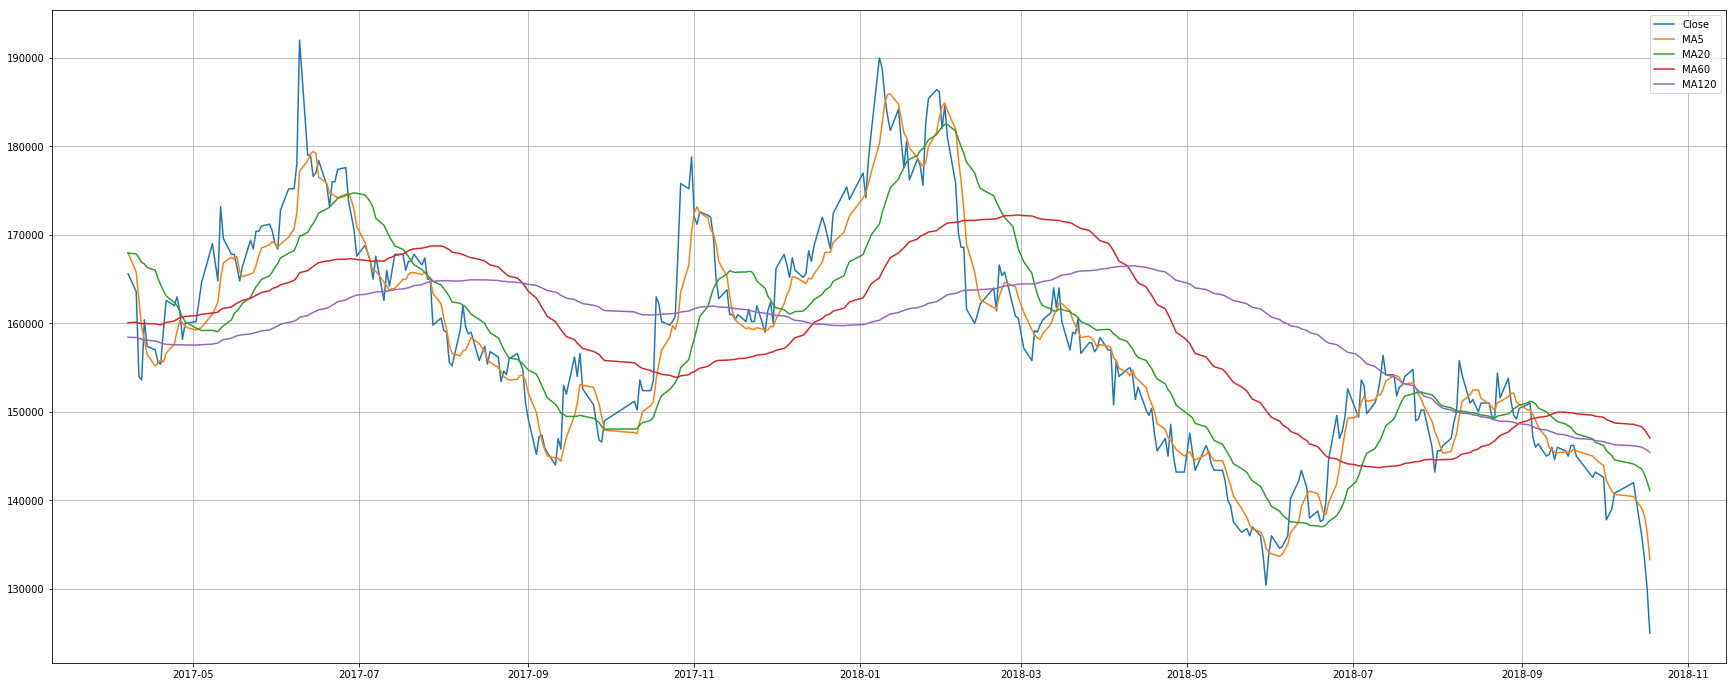

In [79]:
#최근 날짜 기준으로 DAY 만큼 시각화 해라.
def showChart(df, day=365):
    plt.figure(figsize=(30,12))
    tmp = df[-1*day:]
    plt.plot(tmp.index,tmp['Close'],label='Close')
    plt.plot(tmp.index,tmp['MA5'],label='MA5')
    plt.plot(tmp.index,tmp['MA20'],label='MA20')
    plt.plot(tmp.index,tmp['MA60'],label='MA60')
    plt.plot(tmp.index,tmp['MA120'],label='MA120')
    plt.grid()
    plt.legend()
showChart(NAVER)